## **ML-Model to detect gender age based on his/her voice**   
In this notebook, I am using a common-voice dataset to train a model for detecting age of
a person based on his/her voice

### **Stepwise ML-model development**  
This notebook is created for beginners to develop age detection ml-model with stepwise approach using common-voice dataset.
The notebook include following steps:
* Data Collection
* Data Pre-processing
* Feature Engineering
* Model Selection
* Model Analysis
* Model Deployment

In [1]:
is_kaggle = False
if is_kaggle:
    test_location = "../input/common-voice/cv-valid-test.csv"
    train_location = "../input/common-voice/cv-valid-train.csv"
    test_file_location = "/kaggle/input/common-voice/cv-valid-test/"
    train_file_location = "/kaggle/input/common-voice/cv-valid-train/"
else:
    test_location = "/content/drive/MyDrive/Data/Diss/cv-valid-test.csv"
    train_location = "/content/drive/MyDrive/Data/Diss/cv-valid-train.csv"
    train_file_location = "/content/drive/MyDrive/Data/Diss/train/"
    test_file_location = "/content/drive/MyDrive/Data/Diss/cv-valid-test/"


In [2]:
if is_kaggle == False:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


### **Step-01 Data Collection**  
In this step the data is loaded and explored. The data is understood with basic graphs and to check if the dataset is balanced.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns # visualizing data with stunning default theme
import sklearn # contain algorithms
import warnings
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

# load dataset from input directory
df = pd.read_csv(train_location)
len(df)
#df[df['age'].notna()].head()
#df = df.sample(frac=1, random_state=42)
#print(len(df))
#df.tail()

195776

In [4]:
df.head()

,filename,text,up_votes,down_votes,age,gender,accent,duration
0,cv-valid-train/sample-000000.mp3,learn to recognize omens and follow them the o...,1,0,NaN,NaN,NaN,NaN
1,cv-valid-train/sample-000001.mp3,everything in the universe evolved he said,1,0,NaN,NaN,NaN,NaN
2,cv-valid-train/sample-000002.mp3,you came so that you could learn about your dr...,1,0,NaN,NaN,NaN,NaN
3,cv-valid-train/sample-000003.mp3,so now i fear nothing because it was those ome...,1,0,NaN,NaN,NaN,NaN
4,cv-valid-train/sample-000004.mp3,if you start your emails with greetings let me...,3,2,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['filename', 'text', 'up_votes', 'down_votes', 'age', 'gender', 'accent',
       'duration'],
      dtype='object')

In [6]:
df.count()

filename      195776
text          195776
up_votes      195776
down_votes    195776
age            73768
gender         74059
accent         64711
duration           0
dtype: int64

In [7]:
df.isna().sum()

filename           0
text               0
up_votes           0
down_votes         0
age           122008
gender        121717
accent        131065
duration      195776
dtype: int64

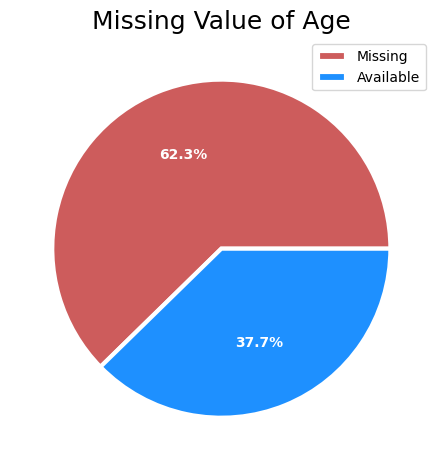

In [8]:
def show_missing_pie_chart(df, column_name):
    labels = ['Missing', 'Available']
    sizes = [df[column_name].isna().sum(),df[column_name].count()]

    fig, ax = plt.subplots()
    patches, texts, pcts = ax.pie(sizes,  autopct='%1.1f%%', colors=['indianred', 'dodgerblue'],  wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})

    # Style just the percent values.
    plt.setp(pcts, color='white', fontweight='bold')
    ax.set_title(f'Missing Value of {column_name.capitalize()}', fontsize=18)
    plt.legend(patches, labels, loc="best")
    plt.tight_layout()

show_missing_pie_chart(df,'age')

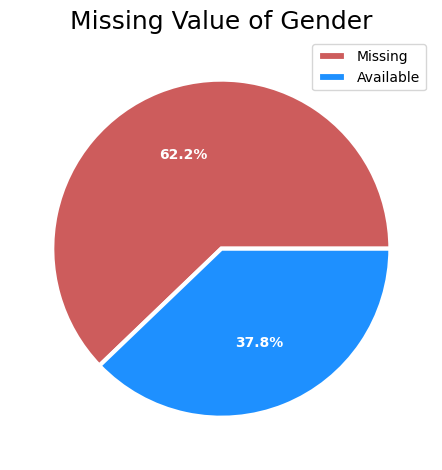

In [9]:
show_missing_pie_chart(df,'gender')

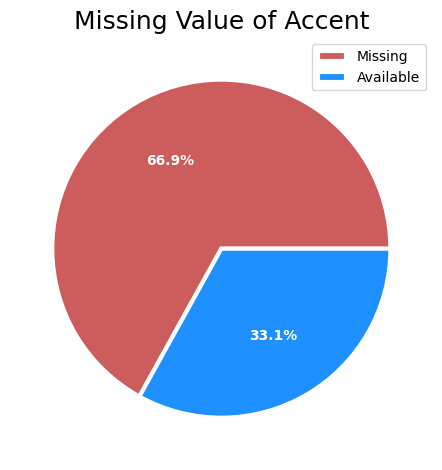

In [10]:
show_missing_pie_chart(df,'accent')

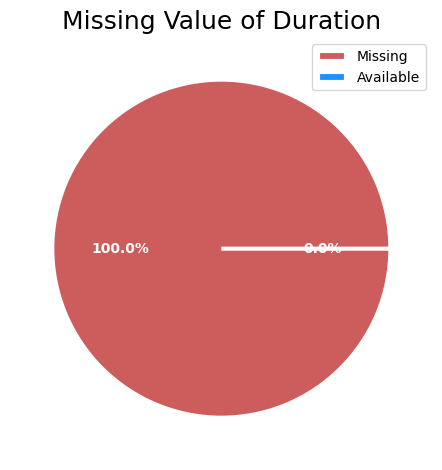

In [11]:
show_missing_pie_chart(df,'duration')

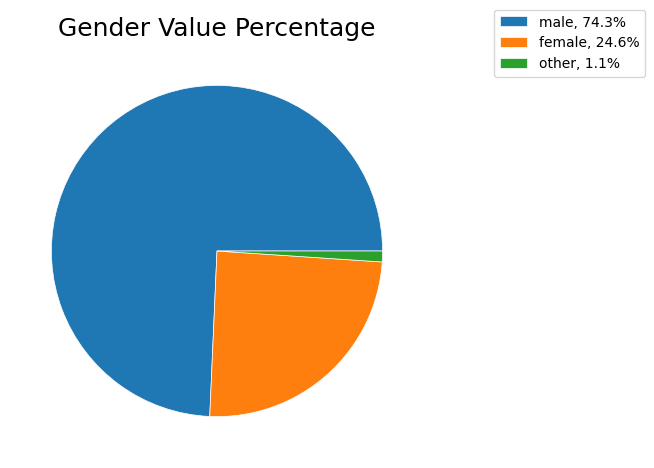

In [12]:
def show_value_pie_chart(df, column_name):
    labels = df[column_name].value_counts().keys()
    sizes = df[column_name].value_counts()
    sizes = sizes.to_numpy() * 100 / sizes.to_numpy().sum()
    labels = [f'{l}, {s:0.1f}%' for l, s in zip(labels, sizes)]

    fig, ax = plt.subplots()
    patches, texts, pcts = ax.pie(sizes,  autopct='',  wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'})

    # Style just the percent values.
    plt.setp(pcts, color='white', fontweight='bold')
    ax.set_title(f'{column_name.capitalize()} Value Percentage', fontsize=18)
    plt.legend(patches, labels, bbox_to_anchor=(1.55,1.1), loc='upper right')
    plt.rcParams['font.size'] = 12
    plt.tight_layout()


show_value_pie_chart(df,'gender')

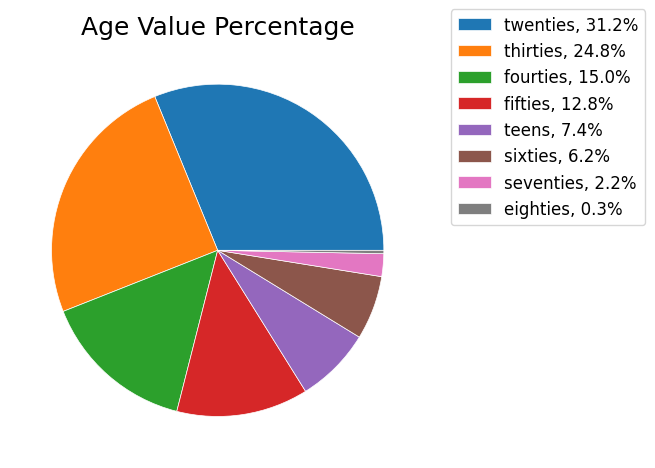

In [13]:
show_value_pie_chart(df,'age')

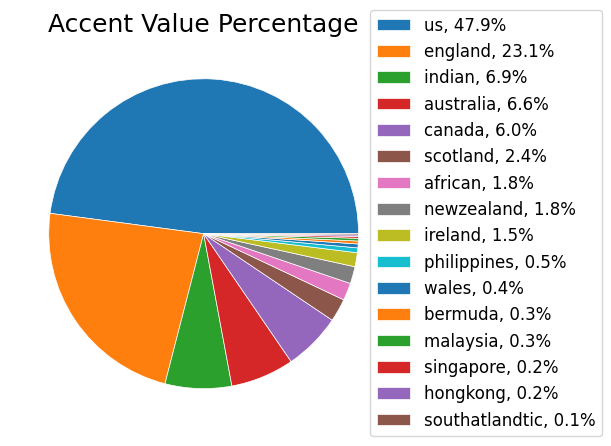

In [14]:
show_value_pie_chart(df,'accent')

In [15]:
df_test = pd.read_csv(test_location)
df_test[df_test['age'].notna()].tail()

,filename,text,up_votes,down_votes,age,gender,accent,duration
3976,cv-valid-test/sample-003976.mp3,we've got her located,1,0,thirties,male,england,NaN
3979,cv-valid-test/sample-003979.mp3,she has all your features,1,0,thirties,male,NaN,NaN
3980,cv-valid-test/sample-003980.mp3,i've got to see nicole right away,1,0,fifties,male,australia,NaN
3984,cv-valid-test/sample-003984.mp3,but there were certain of them who took a bit ...,2,0,thirties,male,NaN,NaN
3989,cv-valid-test/sample-003989.mp3,i'm playing for keeps,2,0,fifties,male,australia,NaN


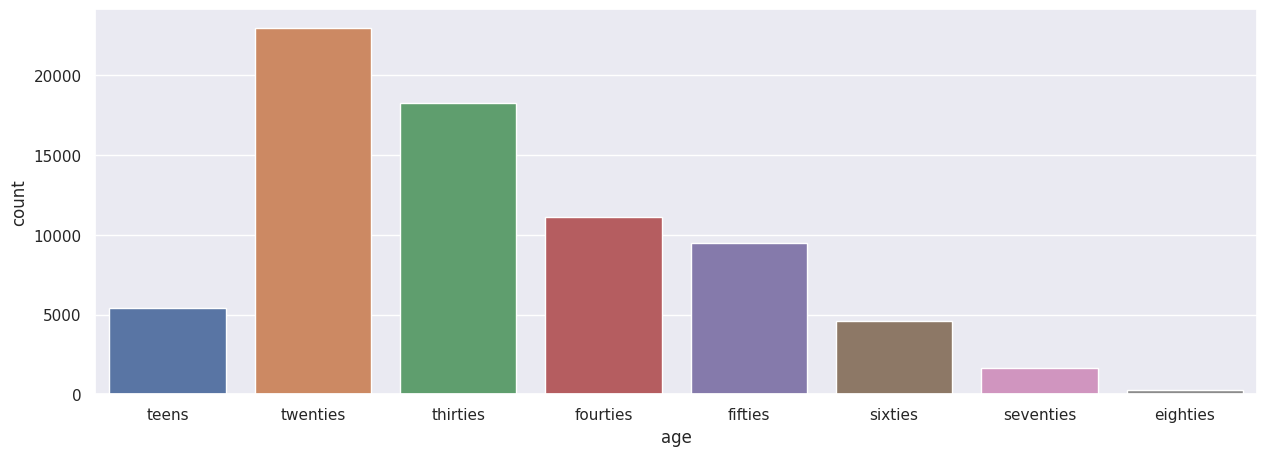

In [16]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.countplot(x="age",
        data=df[df['age'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()


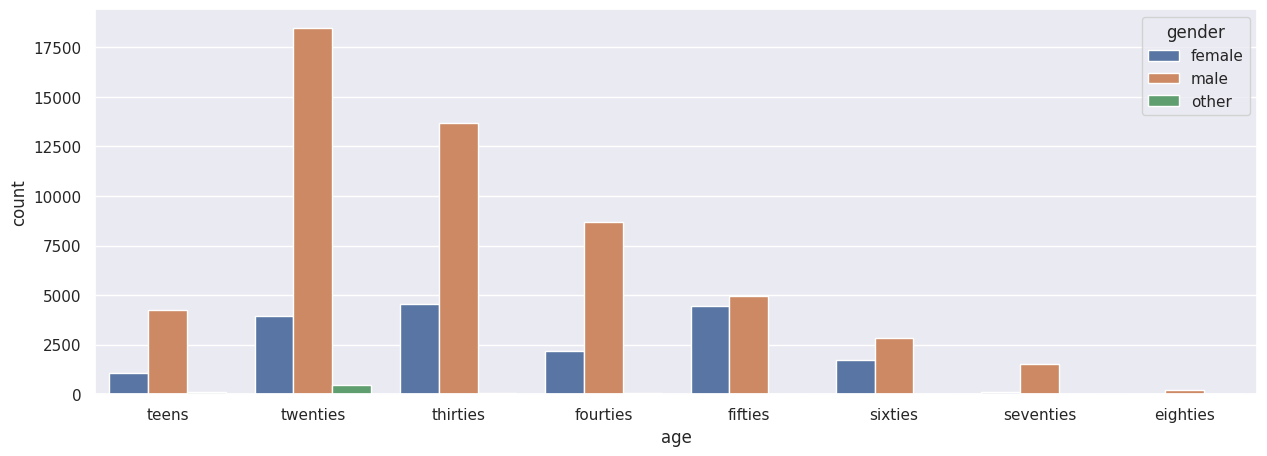

In [17]:
sns.countplot(x="age",
        hue='gender',
        data=df[df['age'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

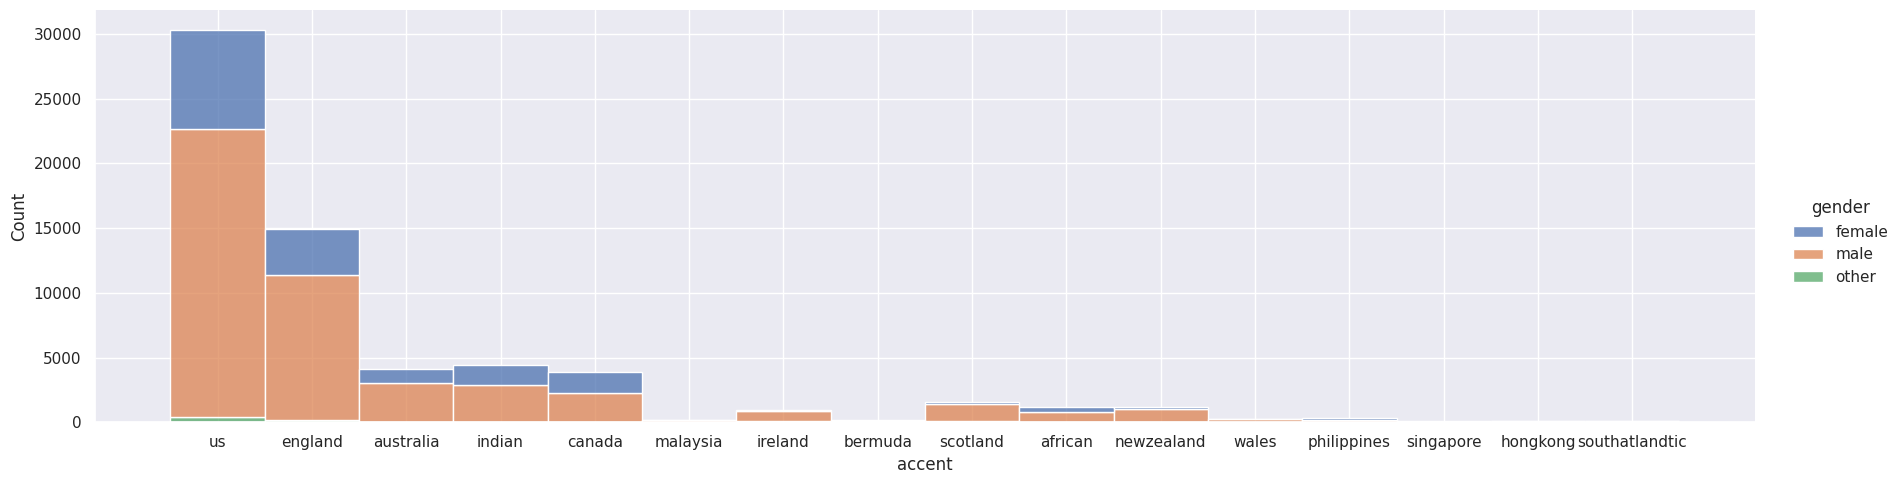

In [18]:
sns.displot(x="accent",
        data=df[df['accent'].notna()],
        hue='gender',
        multiple='stack',
        height=5, aspect=18/5)

plt.show()

initial: (195776, 8) final: (63163, 8)


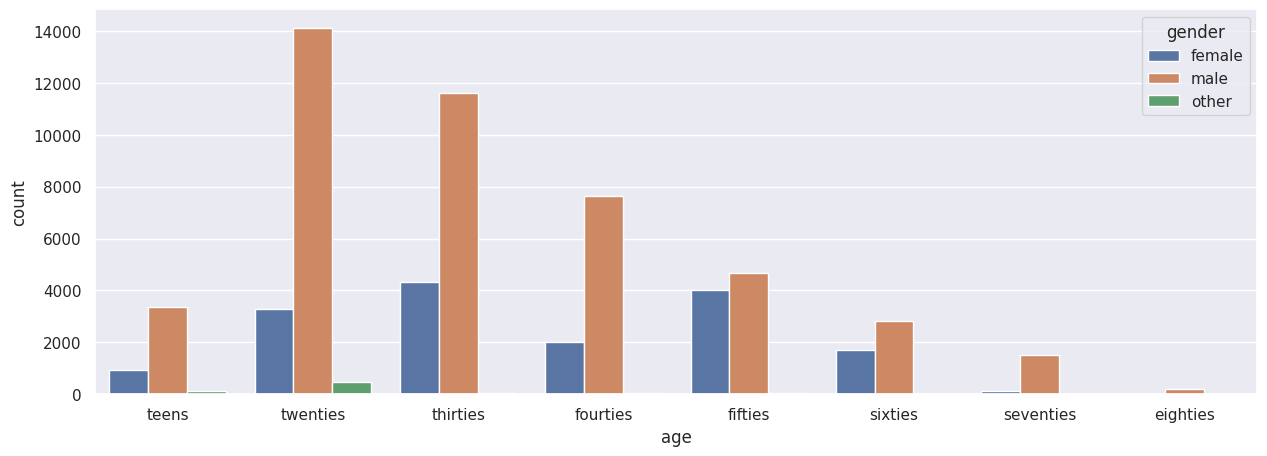

In [19]:
#del df['duration']
start=df.shape
#df.isna().sum()
end = df[df['age'].notna()& df['gender'].notna() & df['accent'].notna()].shape
print("initial: {} final: {}".format(start, end))
sns.countplot(x="age",
        hue='gender',
        data=df[df['age'].notna()& df['gender'].notna() & df['accent'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

#### **First-step findings**
We understood the dataset and also found that the dataset is imbalance. To refine the dataset for ml-model, we need to perform pre-processing in next-step.